In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams['animation.html'] = 'html5'

# 2D Advection Equation

In [30]:
nx = 51
ny = 51
Lx = 1.0
Ly = 1.0
# x = np.linspace(0, Lx, nx)
# y = np.linspace(0, Ly, ny)
dxy=100
x = np.mgrid[-2500:2500+dxy:dxy]
y = x
dx = Lx/(nx-1)
dy = Ly/(ny-1)
xx, yy = np.meshgrid(x, y)

In [37]:
x

array([-2500, -2400, -2300, -2200, -2100, -2000, -1900, -1800, -1700,
       -1600, -1500, -1400, -1300, -1200, -1100, -1000,  -900,  -800,
        -700,  -600,  -500,  -400,  -300,  -200,  -100,     0,   100,
         200,   300,   400,   500,   600,   700,   800,   900,  1000,
        1100,  1200,  1300,  1400,  1500,  1600,  1700,  1800,  1900,
        2000,  2100,  2200,  2300,  2400,  2500])

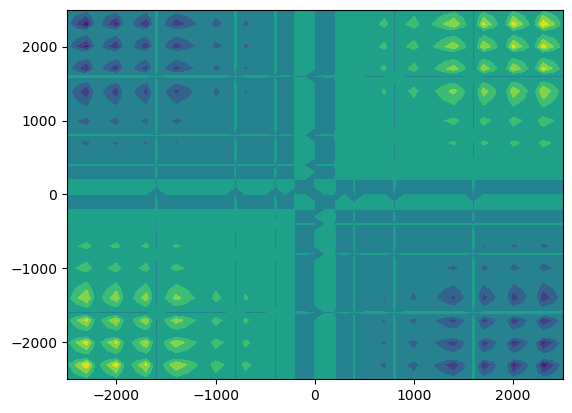

In [31]:
ω0 = 2.0*np.pi
u0 = lambda x, y: np.sin(ω0*x) * np.sin(ω0*y)
# plotting the initial conditions
plt.contourf(xx, yy, u0(xx, yy))

In [32]:
cx = 1.0
cy = 1.0

dt = 0.001
tend = 2.0
t = 0

cflx = cx * dt/dx
cfly = cy * dt/dy

# setup initial condition
sol = []
u = np.zeros([nx+2, ny+2])
u[1:-1, 1:-1] = u0(xx, yy)
# set periodic boundaries

u[:,0] = u[:,-3] #x-minus face
u[:,-1] = u[:,2] #x-plus face
u[0,:] = u[-3,:] #y-minus face
u[-1,:] = u[2,:] #y-plus face
sol.append(u)

In [33]:
while t < tend:
    un = sol[-1]
    unew = un.copy()
    unew[1:-1, 1:-1] = un[1:-1, 1:-1] - cflx * (un[1:-1, 1:-1] - un[1:-1, :-2]) - cfly * (un[1:-1, 1:-1] - un[:-2,1:-1])
    unew[:,0] = unew[:,-3] #x-minus face
    unew[:,-1] = unew[:,2] #x-plus face
    unew[0,:] = unew[-3,:] #y-minus face
    unew[-1,:] = unew[2,:] #y-plus face
    unew[-1] = unew[2]
    unew[0] = unew[-3]
    sol.append(unew)
    t += dt

In [34]:
new_sol = []
for solution in sol:
    new_sol.append(solution[1:-1, 1:-1])

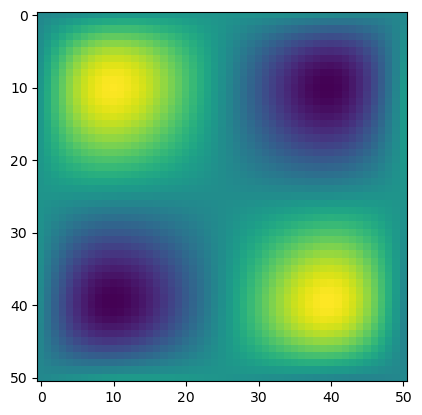

In [35]:
plt.imshow(new_sol[1000])

# Trying to make the solution look like what we have in Gaussian Plume Practical

In [24]:
np.mean(sol, axis=1)

array([[ 5.04051727e-18,  0.00000000e+00, -1.26994851e-17, ...,
         5.04051727e-18,  1.89540577e-32, -1.26994851e-17],
       [ 4.42240822e-05,  6.13699343e-19, -4.42240822e-05, ...,
         4.42240822e-05,  2.90484356e-19, -4.42240822e-05],
       [ 9.27659566e-05,  4.42240822e-06, -8.39908842e-05, ...,
         9.27659566e-05,  4.42240822e-06, -8.39908842e-05],
       ...,
       [-1.02176017e-03, -9.78166842e-04, -9.19147239e-04, ...,
        -1.02176017e-03, -9.78166842e-04, -9.19147239e-04],
       [-1.01537072e-03, -9.82526175e-04, -9.34186605e-04, ...,
        -1.01537072e-03, -9.82526175e-04, -9.34186605e-04],
       [-1.00792367e-03, -9.85810629e-04, -9.48150762e-04, ...,
        -1.00792367e-03, -9.85810629e-04, -9.48150762e-04]])

In [20]:
np.array(new_sol).shape

(2002, 51, 51)

In [23]:
np.mean(new_sol, axis=0).shape, x.shape, y.shape

((51, 51), (51,), (51,))

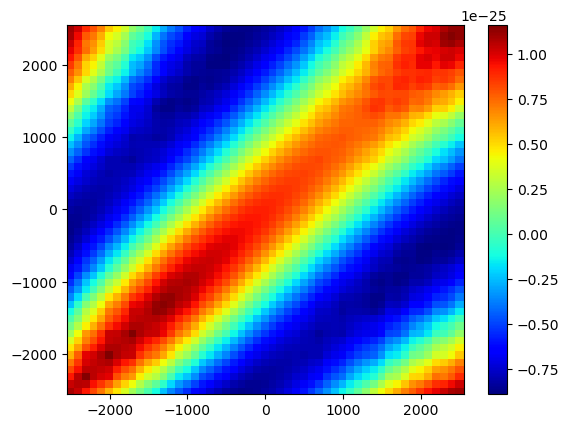

In [36]:
plt.pcolor(x, y, np.mean(new_sol, axis=0), cmap='jet')
plt.colorbar()

In [24]:
dxy = 100
x=np.mgrid[-2500:2500+dxy:dxy]
y=x
days = 50
wind_dir = 0.*np.ones((days*24,1)) # What does this mean?
sol = np.zeros((len(x), len(y), len(wind_dir)))

In [22]:
ω0 = 2.0*np.pi
u0 = lambda x, y: np.sin(ω0*x) * np.sin(ω0*y)
for i in range(0, len(wind_dir)):
    u = np.zeros([nx+2, ny+2])
    u[1:-1, 1:-1] = u0(xx, yy)

1200